# Word2Vec Unigram Testing

This Python Notebook is used for evaluation of the Word2Vec Unigram model. The section is broken down as follows:

- Find most similar words from the selected word
- Perform Syntactic Analysis
- Perform Semantic Analysis
- Find uncommon word among a list of words
- Find cosine similarity among two words
- Find the frequency count of a word
- Check if a word is in the model
- Print preview a list of words
- Visualisation of words in Vector Space using TSNE

In [1]:
from gensim.models import Word2Vec as w2v

C:\Users\MyPC\Anaconda3\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\MyPC\Anaconda3\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [2]:
# Load Unigram model
FILE = "C:/Users/MyPC/Desktop/FYP/W2V Models/w2v_reddit_unigram_300d.bin"
model = w2v.load_word2vec_format(FILE, binary=True)

In [3]:
# Cell to find most similar words 
# One word for unigram: dragon, bleach, tottenham
# Two words for bigram: dragon_ball, barack_obama (UNDERSCORE NEEDED + BIGRAM MODEL LOADED)
model.most_similar("neuropsychopharmacology", topn=20)

[('biopsychology', 0.740115225315094),
 ('astrochemistry', 0.7391058206558228),
 ('neuroendocrinologist', 0.7296165227890015),
 ('nanoscience', 0.7265405058860779),
 ('neuropharmacology', 0.7247588038444519),
 ('saltzberg', 0.7157706618309021),
 ('ethnomusicology', 0.7156946659088135),
 ('psychobiology', 0.7154250144958496),
 ('nueroscience', 0.7147186994552612),
 ('neuropsychiatry', 0.7140935659408569),
 ('ichthyology', 0.710540235042572),
 ('molbio', 0.7056220769882202),
 ('oenology', 0.7056138515472412),
 ('antropology', 0.7041956186294556),
 ('biopsych', 0.7037904858589172),
 ('neuroengineering', 0.7037561535835266),
 ('nanoengineering', 0.7024978995323181),
 ('psycholinguistics', 0.7002543210983276),
 ('bioanthropology', 0.6995773315429688),
 ('christmann', 0.698868989944458)]

In [4]:
# Cell for semantic evaluation (Ex. King - man + woman is approximately equal to queen)
model.most_similar(positive=["tokyo","malaysia"], negative=["japan"])

[('lumpur', 0.6737101674079895),
 ('kuala', 0.6668090224266052),
 ('taipei', 0.6401477456092834),
 ('bangkok', 0.6113026142120361),
 ('penang', 0.5809809565544128),
 ('lampur', 0.5752942562103271),
 ('toyko', 0.5550657510757446),
 ('selangor', 0.5511509776115417),
 ('singapore', 0.5502724647521973),
 ('mumbai', 0.5481346249580383)]

In [5]:
# Cell for syntactic evaluation (Ex. walking - walk + swim is approximately equal to swimming)
model.most_similar(positive=["greenish","blue"], negative=["green"])

[('blueish', 0.7298511266708374),
 ('greyish', 0.7232707738876343),
 ('bluish', 0.7149738669395447),
 ('pinkish', 0.705883264541626),
 ('purplish', 0.7028074264526367),
 ('brownish', 0.6946163773536682),
 ('grayish', 0.6922476887702942),
 ('reddish', 0.6911346316337585),
 ('yellowish', 0.6770833134651184),
 ('whitish', 0.6669460535049438)]

In [6]:
# Cell to check which word doesn't match among a group of words
model.doesnt_match("blue green yellow apple".split())

'apple'

In [7]:
# Cell to check similarity among two words
model.similarity("titanic","rose")

0.24046405589195533

In [8]:
# Count number of times a specific word occured in the 2015 Dataset
word = model.vocab['difu']
type(word.count)

int

In [9]:
# Check if word (Unigram) is in model. It is case-sensitive
'Dragon' in model

False

In [10]:
# A brief review of words in the model
count = 70

for index, word in enumerate(model.vocab):
    print(index, word, model.vocab[word].count)
    if index == count:
        break

0 guncraft 872865
1 majoran 99873
2 rejailbreaking 826941
3 nikakav 771899
4 piperanci 710825
5 cqxe 515776
6 rsdtyler 507115
7 sollie 435384
8 boinx 455347
9 clocked 1130326
10 vikt 750859
11 onresize 329468
12 iwamiger 895423
13 nickibee 326422
14 polonais 314179
15 iuq 956664
16 atenolol 959437
17 chooths 373156
18 burrista 126450
19 adustycraphopper 488767
20 anothersoul 804725
21 diavola 841148
22 enounced 5970
23 werburghs 646778
24 biglands 569222
25 spiderwheels 134090
26 awda 154548
27 croyder 384187
28 akkarat 966142
29 metrogel 860290
30 ajchen 904863
31 aethelric 849745
32 belic 877375
33 clickclacks 666515
34 bikta 298037
35 phillan 165512
36 mizuki 1063805
37 interfluidity 191334
38 hydrodipping 870031
39 inarajan 184989
40 ketquaxosowap 475750
41 impetuosity 582267
42 zerth 433872
43 komander 115511
44 reharmonized 398025
45 gillivray 930867
46 bridgespan 337231
47 advocators 860475
48 sotrue 466741
49 mathijssen 355133
50 uins 269424
51 mag 1140448
52 heyo 1107494
53 me

In [31]:
# Visualisation (Normal) using TSNE
# Motivation: http://lvdmaaten.github.io/tsne/
# Video: https://www.youtube.com/watch?v=RJVL80Gg3lA

# Firstly: Import the libraries
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

%matplotlib inline

In [22]:
# Create function to return list of words and word embeddings

def getEmbeddings():
    
    # Arrays to store feature vector and words
    vectors = []
    words = []
    
    # Add vector and words
    # Add vectors and words
    for word in model.vocab:
        
        vectors.append(model[word]) 
        words.append(word)
        
    return vectors, words

C:\Users\MyPC\Anaconda3\lib\site-packages\matplotlib\text.py:2130: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


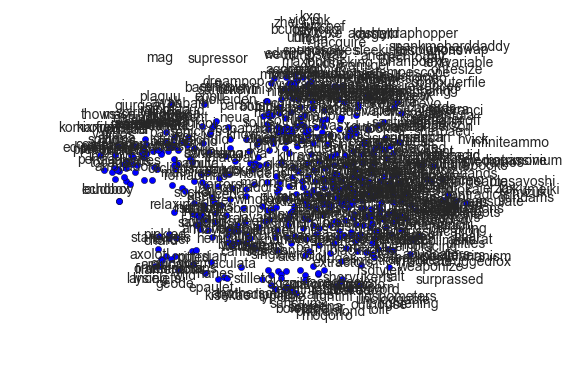

In [35]:
# Display the graph in this cell

# Get the feature vectors and respective words
wv, vocabulary = getEmbeddings()

# Initialize TSNE model
tsne = TSNE(n_components=2, random_state=0)

# Fit with first 500 words 
Y = tsne.fit_transform(wv[:500])

# Use Scatterplot
plt.scatter(Y[:, 0], Y[:, 1])

# Initialize Points
for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), textcoords='offset points')

plt.axis("off")
plt.show()